# Illustrations numériques autour de la méthode du rejet

## Exemple: loi gamma par la méthode du rejet

Soit $\alpha \in ]0, 1[$. On considère $X$ de loi gamma de paramètre $\alpha$ _i.e._ de densité
\begin{equation*}
    f(x) = \frac{1}{\Gamma(\alpha)} x^{\alpha - 1} e^{-x} \mathbf{1}_{]0,+\infty[}(x).
\end{equation*}
Pour mettre en oeuvre la méthode du rejet on considère par exemple la densité auxiliaire
\begin{equation*}
    g(x) = \frac{\alpha e}{\alpha + e} \big(x^{\alpha-1} \mathbf{1}_{]0,1[}(x) + e^{-x} \mathbf{1}_{[1,+\infty[}(x) \big)
\end{equation*}
qui vérifie $f(x) \le \big(\frac{\alpha + e}{\alpha e \Gamma(\alpha)} \big) g(x)$ pour tout $x \in \mathbf{R}$. 
Il est très important de considérer les fonctions $f$ et $g$ normalisées c'est à dire telles que $\int f(x) \operatorname{d}\! x = \int g(x) \operatorname{d}\! x = 1$. 
La constante qui apparait dans l'hypothèse de majoration est donc ici $c_\alpha = \frac{\alpha + e}{\alpha e \Gamma(\alpha)} > 1$.

Pour simuler selon la loi de densité $g$ on utilise l'inverse de la fonction de répartition: on vérifie que la fonction quantile $G^{-1}$ s'écrit
\begin{equation*}
    \forall u \in ]0,1[, \quad G^{-1}(u) = \big(\frac{\alpha + e}{e} u \big)^{1/\alpha} \mathbf{1}_{\{u < \frac{e}{\alpha+e}\}} - \log \big((1-u) \frac{\alpha + e}{\alpha e} \big) \mathbf{1}_{\{u \ge \frac{e}{\alpha + e}\}}.
\end{equation*}

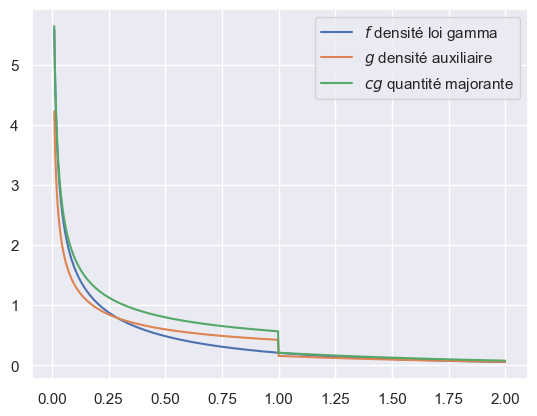

In [29]:
import numpy as np
import scipy.stats as stats 
from scipy.special import gamma
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

alpha = 0.5
rv = stats.gamma(alpha)

x = np.linspace(0.01, 2, 1000)

# toujours écrire une fonction vectorielle 
# c'est à dire qui s'applique à un argument x de type `numpy.array`
# il faut donc éviter les tests `if x < 1 else ...`
def g(x, alpha): 
    cst = (alpha * np.exp(1)) / (alpha + np.exp(1))
    result = np.empty_like(x)
    result[x < 1] = x[x < 1]**(alpha-1)
    result[x >= 1] = np.exp(-x[x >= 1])
    return cst * result
    
# la constante c de l'hypothèse de domination 
c = (alpha + np.exp(1)) / (alpha * np.exp(1) * gamma(alpha))

fig, ax = plt.subplots(1, 1)
ax.plot(x, rv.pdf(x), label=r'$f$ densité loi gamma')
ax.plot(x, g(x, alpha), label=r'$g$ densité auxiliaire')
ax.plot(x, c*g(x, alpha), label='$cg$ quantité majorante')
ax.legend()

## Exemple: lien avec une méthode intuitive pour la loi uniforme